# Aprendizaje Automático
#### Segundo cuatrimestre 2025

## Regresión Lineal

#### Bibliografía: 
* Pattern Recognition and Machine Learning, Christopher M. Bishop. Capíulo 3.
* The Elements of Statistical Learning, Trevor Hastie, Robert Tibshirani, Jerome Friedman. Capítulo 3.

Papers:
* Ridge Regression: Biased Estimation for Nonorthogonal Problems, Arthur E. Hoerl and Robert W. Kennard, 1970.
* Regression Shrinkage and Selection via the Lasso, Robert Tibshirani, 1996.
* Regularization and variable selection via the elastic net, Hui Zou and Trevor Hastie, 2005.

### Regresión Lineal: formulación

La regresión lineal es un modelo que asume que la relación entre las variables de entrada $X^T = (X_1, X_2,..., X_p)$ y la variable de salida $Y$ es lineal. Entonces, toma la forma:

$$ f(X) = \beta_0 + \sum_{j=1}^{p} X_j \beta_j$$

En general, se suele escribir de forma más compacta como

$$ f(X) = X^T \beta$$

donde $X$ es un vector de tamaño $p+1$ que contiene un 1 en la primera posición y los valores de las variables de entrada en las siguientes posiciones. $\beta = (\beta_0, \beta_1, ..., \beta_p)$ es el vector de coeficientes a estimar.

**¿Qué estamos asumiendo con esta $f(X)$?**

Estamos asumiendo que la función de regresión $E(Y|X)$ es lineal o que **el modelo lineal es una buena aproximación**.

**¿Qué son los $X$ ?**

Prácticamente cualquier cosa que se nos ocurra:
* Variables continuas.
* Expansiones polinómicas de variables continuas u otros tipos de transformaciones.
* Variables categóricas apropiadamente codificadas.
* Interacciones entre variables.

Lo importante es que el modelo es lineal en los parámetros, no necesariamente en las variables.


### Entrenamiento

Dado un conjunto de entrenamiento $\{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$, el objetivo es encontrar los coeficientes $\beta$ que mejor ajusten a esos datos. Tener en cuenta que cada $x_i = (x_{i1}, x_{i2}, ..., x_{ip})$ es el vector de atributos para la observación $i$ (a veces con un 1 en la primera posición).

*mejor ajusten a los datos* ---> En general significa minimizar una función de costo. En este caso, la función de costo más común es la suma de los residuos al cuadrado (RSS):

$$RSS = \sum_{i=1}^{N} (y_i - f(x_i))^2$$

y el método más común para encontrar los coeficientes es el de **cuadrados mínimos**, que consiste en minimizar RSS respecto de $\beta$.

### Entrenamiento - Cuadrados mínimos

Utilizando notación matricial, podemos reescribir la suma de los residuos al cuadrado como:

$$ RSS (\beta) = ||\textbf{y} - \textbf{X} \beta||^2 = (\textbf{y} - \textbf{X} \beta)^T (\textbf{y} - \textbf{X} \beta) $$

donde es explícita la dependencia de la función de costo respecto de los parámetros $\beta$.

Si diferenciamos respecto de $\beta$, obtenemos la primera derivada:

$$\frac{\partial RSS}{\partial \beta} = -2 \textbf{X}^T (\textbf{y} - \textbf{X} \beta)$$

y, diferenciando nuevamente, la segunda derivada:

$$\frac{\partial^2 RSS}{\partial \beta^2}^* = 2 \textbf{X}^T \textbf{X}$$

*(dejamos de lado un $\beta^T$ para simplificar la notación).

### Entrenamiento - Cuadrados mínimos

Si, además, $\textbf{X}$ tiene rango completo, entonces $\textbf{X}^T \textbf{X}$ es definida positiva, lo que implica que la función de costo es convexa y tiene un mínimo que podemos obtener igualando la segunda derivada a cero (ecuación normal):

$$\textbf{X}^T (\textbf{y} - \textbf{X} \beta) = 0  $$

cuya solución es:

$$\hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

De esta forma, las predicciones $\hat{\textbf{y}}$ se obtienen como:

$$\hat{\textbf{y}} = \textbf{X} \hat{\beta} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

Desde un punto de vista operativo, ya está. Obtuvimos un estimador de los coeficientes $\hat{\beta}$ que nos sirve para hacer predicciones. No hay, prácticamente, ninguna hipótesis sobre los datos, más allá de que $\textbf{X}$ tiene rango completo.


### Derivando matrices

$$ (\textbf{y} - \textbf{X} \beta)^T (\textbf{y} - \textbf{X} \beta) = (\textbf{y}^T - \beta^T \textbf{X}^T)(\textbf{y} - \textbf{X} \beta)$$

$$ (\textbf{y}^T - \beta^T \textbf{X}^T)(\textbf{y} - \textbf{X} \beta) = \textbf{y}^T \textbf{y} - \textbf{y}^T \textbf{X} \beta - \beta^T \textbf{X}^T \textbf{y} + \beta^T \textbf{X}^T \textbf{X} \beta$$

Considerar que tanto $\textbf{y}^T \textbf{X} \beta$ como $\beta^T \textbf{X}^T \textbf{y}$ son escalares, por lo que se cumple que $\textbf{y}^T \textbf{X} \beta = (\textbf{y}^T \textbf{X} \beta)^T = \beta^T \textbf{X}^T \textbf{y}$. Entonces, 

$$ (\textbf{y} - \textbf{X} \beta)^T (\textbf{y} - \textbf{X} \beta) = \textbf{y}^T \textbf{y} - 2 \textbf{y}^T \textbf{X} \beta + \beta^T \textbf{X}^T \textbf{X} \beta.$$


Como la derivada tiene tantos componentes como $\beta$, que es **vector columna**, debemos obtener un vector columna. Tener en cuenta la siguiente propiedad $\frac{\partial}{\partial \beta} (a^T \beta) = a$ si $a$ no depende de $\beta$.

Entonces, si diferenciamos respecto de $\beta$, obtenemos:

$$ \frac{\partial}{\partial \beta} (\textbf{y}^T \textbf{y}) = 0$$
$$ \frac{\partial}{\partial \beta} (-2 \textbf{y}^T \textbf{X} \beta) = -2 \textbf{X}^T \textbf{y}$$
$$ \frac{\partial}{\partial \beta} (\beta^T \textbf{X}^T \textbf{X} \beta) = 2 \textbf{X}^T \textbf{X} \beta$$



### Geometría de los resultados
<img src="Figuras/Geometría cuadrados mínimos.png" alt="Figura 1" width="400" />

### Geometría de los resultados

* Los vectores columnas de $\textbf{X}$ generan un subespacio en $\mathbb{R}^N$. *Pregunta: ¿cuál es su dimensión?*
* De $\textbf{X}^T (\textbf{y} - \textbf{X} \beta) = 0 $ se deduce que el vector $\textbf{y} - \hat{\textbf{y}}$ es ortogonal a este subespacio.
    * Por lo tanto, la solución $\hat{\beta}$ es el vector que minimiza la distancia entre $\textbf{y}$ y el espacio generado por los vectores columnas de $\textbf{X}$.

Entonces, $\hat{\textbf{y}}$ es la proyección ortogonal de $\textbf{y}$ en ese subespacio. La matriz encargada de hacer esa proyección es $\textbf{H}$, conocida como **matriz de proyección** o **matriz hat**.

$$ \hat{\textbf{y}} = \textbf{X} \hat{\beta} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

¿Cuándo hay problemas? Si las columnas de $\textbf{X}$ no son linealmente independientes -  no tiene rango completo - $\textbf{X}^T \textbf{X}$ no es invertible, por lo que puede haber más de un $\hat{\beta}$. Sin embargo, se sigue cumpliendo que $\hat{\textbf{y}}$ siguen siendo la proyección de $\textbf{y}$ en ese subespacio, solamente que hay más de una forma de expresarlo.

### Un poco de estadística

$$\hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

En general, dado un estimador, se suele estudiar su esperanza, varianza y distribución:

* La esperanza sirve para ver si el estimador es sesgado o no. Un estimador $\hat{\beta}$ es insesgado si $E(\hat{\beta}) = \beta$.
* La varianza mide la dispersión del estimador alrededor de su valor esperado. Si la varianza es baja, el estimador es más confiable.
* La distribución nos dice cómo se comporta el estimador en diferentes muestras. Sirve, por ejemplo, para construir intervalos de confianza.

Para calcular cada uno de estos valores, es necesario hacer algunas suposiciones sobre el modelo (generalmente, de manera incremental). 

### Un poco de estadística

Para calcular cada uno de estos valores, es necesario hacer algunas suposiciones sobre el modelo (generalmente, de manera incremental). 

Asumimos que:

1. El modelo lineal es correcto:
     $$Y = E(Y|X_1, ..., X_p) + \epsilon$$
     $$Y = \beta_0 + \sum_{j=1}^{p} X_j \beta_j + \epsilon$$
1. Las observaciones $y_i$ son independientes entre sí, con varianza constante $\sigma^2$.
1. Los $x_i$ son fijos y no aleatorios.
1. Los errores siguen una distribución normal: $\epsilon \sim N(0, \sigma^2)$.

* En algunas circunstancias, será conveniente escribir que $Var(\epsilon) = \sigma^2 I$, donde $I$ es la matriz identidad.
* Se pueden relajar algunos supuestos para obtener resultados similares, pero no es el objetivo de esta materia.

### Un poco de estadística

Entonces,

$$\hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

$$\hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T (\textbf{X} \beta + \epsilon)$$

$$\hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{X} \beta + (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon$$

$$\hat{\beta} = \beta + (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon$$

**Esperanza**
$$E(\hat{\beta}) = E(\beta + (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon)$$

$$E(\hat{\beta}) = \beta + E((\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon)$$

Como $E(\epsilon) = 0$, entonces $E((\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon) = 0$ y, por lo tanto, $E(\hat{\beta}) = \beta$. Esto implica que el estimador es insesgado.

### Un poco de estadística

$$\hat{\beta} = \beta + (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon$$

**Varianza**

$$Var(\hat{\beta}) = Var(\beta + (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon)$$
$$Var(\hat{\beta}) = Var((\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon)$$

**Propiedad:** Si $\textbf{A}$ es una matriz constante y $\textbf{b}$ un vector aleatorio, entonces $Var(\textbf{A} \textbf{b}) = \textbf{A} Var(\textbf{b}) \textbf{A}^T$ (análogo a la versión escalar $Var(a b) = a^2 Var(b)$).

Aplicado acá:

$$Var(\hat{\beta}) = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T Var(\epsilon) \textbf{X} (\textbf{X}^T \textbf{X})^{-1}$$

Como $Var(\epsilon) = \sigma^2 I$, entonces:

$$Var(\hat{\beta}) = \sigma^2 (\textbf{X}^T \textbf{X})^{-1}$$

¿Cómo estimamos $\sigma^2$? 

$$\hat{\sigma}^2 = \frac{1}{N - p - 1} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$


### Un poco de estadística

#### Distribución

Como los errores son normales, $\epsilon \sim N(0, \sigma^2 I)$, entonces $$\hat{\beta} \sim N(\beta, (\textbf{X}^T \textbf{X})^{-1} \sigma^2) $$

**¿Por qué?**

El estimador $\hat{\beta} = \beta + (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \epsilon$ es una combinación lineal de variables aleatorias normales, por lo que también es normal. La esperanza y la varianza se obtienen directamente de la expresión anterior.

**Propiedad:**
Si $\textbf{b}$ un vector aleatorio con distribución normal $N(\mu, \Sigma)$ y $\textbf{A}$ una matriz constante, entonces $\textbf{A} \textbf{b} \sim N(\textbf{A} \mu, \textbf{A} \Sigma \textbf{A}^T)$.

En este caso, $\textbf{A} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T$.

### Un poco de estadística

**Otros resultados relevantes:**
1. El estimador de la variación de los errores $\hat{\sigma}^2$ sigue una distribución $\chi^2$ con $N - p - 1$ grados de libertad.
    $$ \hat{\sigma}^2 \sim \frac{\sigma^2}{N - p - 1} \chi^2_{N - p - 1}$$

1. Para evaluar si un coeficiente $\beta_j$ es significativo, se utiliza el *Z-score*:
$$Z_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{(\textbf{X}^T \textbf{X})^{-1}_{jj}}}$$
Bajo la hipótesis nula, $Z_j$ sigue una distribución $t$ con $N - p - 1$ grados de libertad, que para grandes muestras se aproxima a una normal.

### Un poco de estadística

**Otros resultados relevantes:**

3. Estadístico $F$. Supongamos que queremos comparar un modelo con $p_1 + 1$ parámetros con otro modelo con $p_0 + 1$ parámetros ($p_0 < p_1$). Entonces, el estadístico $F$ se define como:
$$F = \frac{(RSS_0 - RSS_1) / (p_1 - p_0)}{RSS_1 / (N - p_1 - 1)}$$
donde $RSS_0$ y $RSS_1$ son los residuos de los modelos con $p_0 + 1$ y $p_1 + 1$ parámetros, respectivamente. $F$ mide el cambio en la suma de residuos al cuadrado ($RSS_0 - RSS_1$) por cada parámetro adicional en el modelo ($p_1 - p_0$), normalizado por una estimación de la varianza ($RSS_1 / (N - p_1 - 1)$).

Bajo la hipótesis nula de que el modelo más chico es correcto, $F$ sigue una distribución $F_{p_1 - p_0, N - p_1 - 1}$.


### Descenso por gradiente

En conjuntos de datos muy grandes, el cálculo de la matriz $\textbf{X}^T \textbf{X}$ puede ser muy costoso. En estos casos, se puede utilizar un algoritmo de optimización como el descenso por gradiente para encontrar los coeficientes $\beta$.

**Descenso por gradiente estocástico**

1. Inicializar $\beta$ con valores aleatorios.
1. En cada iteración $\tau$:
   1. Seleccionar una instancia aleatoria $i$ del conjunto de entrenamiento.
   1. Calcular el error: $e_i = y_i - \hat{y}_i = y_i - x_i^T \beta$
   1. Actualizar $\beta^{(\tau + 1)} = \beta^{(\tau)} + \eta e_i x_i$


¿Por qué es un *gradiente*? Considerar que si el *costo* está dado por la suma de los residuos al cuadrado, $RSS = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{N} (y_i - x_i^T \beta)^2$, entonces la derivada respecto de $\beta$ es $\frac{\partial RSS}{\partial \beta} = -2 \sum_{i=1}^{N} (y_i - x_i^T \beta) x_i$. Entonces, el gradiente es $-\frac{1}{N} \frac{\partial RSS}{\partial \beta}$ y la actualización de $\beta$ es $\beta = \beta - \eta \frac{1}{N} \frac{\partial RSS}{\partial \beta}$, donde $\eta$ es la tasa de aprendizaje.

Pero N puede ser muy grande, por lo que se puede usar un solo ejemplo para actualizar $\beta$ en cada iteración. Entonces, el algoritmo se convierte en el descenso por gradiente estocástico.

Si sobrevivieron hasta acá, tratemos de bajar a tierra un poco todo esto.

### Ejercicios

**Ejercicio:** Dado un conjunto de valores $x_1, x_2, ..., x_N$
1. ¿Qué valor $x$ minimiza el error cuadrático ($\sum_{i=1}^{N} (x_i - x)^2$)?
1. ¿Y si el error es absoluto ($\sum_{i=1}^{N} |x_i - x|$)?

**Ejercicio:** Considerar el caso para una única variable predictora $X_1$:
1. Escribir la función de costo $RSS(\beta)$ sin usar la notación matricial. ¿Cuántas componentes tiene $\beta$?
1. Expandir la expresión y mostrar que es una función cuadrática en $\beta$.
1. Encontrar el mínimo de la función cuadrática y mostrar que se obtiene la solución de mínimos cuadrados:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}$$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$$

1. ¿Cómo se modifican esas expresiones si consideramos predictores estandarizados?¿Y si la variable de respuesta también está estandarizada?
4. Plantear la expresión para el caso de $p = 2$ variables predictoras. ¿Cuántas componentes tiene $\beta$? ¿Cuántas ecuaciones hay que resolver para encontrar la solución de mínimos cuadrados? Reflexionar sobre la ventaja de usar la formulación matricial.

**Ejercicio:** Utilizando el dataset de *Prostate Cancer*:
1. Reproducir las Tabla 3.1 y 3.2 del libro Elements of Statistical Learning. Utilizar la librería `statsmodels` de Python para ajustar el modelo lineal. Comparar con los resultados obtenidos en el libro.
1. Reproducir la Tabla 3.2 del libro Elements of Statistical Learning utilizando un estimador de cuadrados mínimos hecho exclusivamente con `numpy`. Comparar con los resultados obtenidos en el libro y con los obtenidos con `statsmodels`.
1. Obtener el estadístico $F$ para el modelo completo y el modelo reducido sin las variables $age$, $lcp$, $gleason$ y $pgg45$. Comparar con el valor obtenido en el libro. Interpretar.
1. Obtener el error en el conjunto de evaluación. Obtener el "benchmark" propuesto en el libro. Graficar las predicciones del modelo completo ($y$ vs $y_{pred}$) y del benchmark.

**Ejercicio:** Utilizando el dataset de *Prostate Cancer*:
1. Implementar un estimador de cuadrados mínimos con descenso por gradiente estocástico. Utilizar una tasa de aprendizaje $\eta = 0.001$ y un número de iteraciones $iter = 10000$. Graficar la evolución de cada coeficiente $\beta_j$ en función de las iteraciones y, en el mismo gráfico, comparar con los resultados obtenidos previamente o en el libro. **Algunas recomendaciones**: no olvidar escalar los predictores e iniciializar los coeficientes $\beta$ a partir de una distribución normal con media cero y varianza uno.
1. Probar diferentes tasas de aprendizaje y número de iteraciones. ¿Qué ocurre si la tasa de aprendizaje es muy baja? ¿Y si es muy alta? ¿Qué ocurre si el número de iteraciones es muy bajo? ¿Y si es muy alto?
1. Probar diferentes inicializaciones de los coeficientes $\beta_j$. ¿Qué ocurre si se inicializan todos en cero? ¿Y si se inicializan en valores aleatorios?
1. Pensar e investigar cómo se podría mejorar este algoritmo. En particular, considerar condiciones de parada y técnicas por *batch*. No es necesario implementar ninguna de esas mejoras, pero sí pensar en cómo se podrían implementar y qué ventajas tendrían.

**Ejercicio:** Ir a la documentación y al código de la [regresión lineal en Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Familiarizarse con ella. Leer el comentario acerca de la implementación en "Notes". Luego, ir al código y ver cómo está implementado el `.fit()`. ¿Qué diferencias hay con lo visto?

**Ejercicio:** Ir a la documentación de la [regresión Ridge en Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). Leer acerca de los *solvers* disponibles y sus diferencias. ¿Cómo se relacional con lo visto? Volveremos sobre este ejercicio.


# Ejercicio 3: Tablas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:

# Cargar datos
path = "prostate.data2.txt"
df = pd.read_table(path, sep='\t')

predictors = ['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']
target = 'lpsa'

# Partición train / test según columna 'train'
train_df = df[df['train']=='T'].copy()
test_df  = df[df['train']=='F'].copy()

X_train = train_df[predictors].to_numpy()
y_train = train_df[target].to_numpy()
X_test  = test_df[predictors].to_numpy()
y_test  = test_df[target].to_numpy()

n_train, p = X_train.shape

print(f"Train size: {n_train}, Test size: {len(test_df)}; p = {p}")

Train size: 67, Test size: 30; p = 8


In [27]:
# 1) Tabla 3.1: Correlaciones entre predictores
corr_pred = pd.DataFrame(X_train, columns=predictors).corr()
print("\nTABLA 3.1 - Correlaciones entre predictores (set de entrenamiento):")
display(np.round(corr_pred, 3))


TABLA 3.1 - Correlaciones entre predictores (set de entrenamiento):


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000,0.300,0.286,0.063,0.593,0.692,0.426,0.483
lweight,0.300,1.000,0.317,0.437,0.181,0.157,0.024,0.074
age,0.286,0.317,1.000,0.287,0.129,0.173,0.366,0.276
lbph,0.063,0.437,0.287,1.000,-0.139,-0.089,0.033,-0.030
svi,0.593,0.181,0.129,-0.139,1.000,0.671,0.307,0.481
lcp,0.692,0.157,0.173,-0.089,0.671,1.000,0.476,0.663
gleason,0.426,0.024,0.366,0.033,0.307,0.476,1.000,0.757
pgg45,0.483,0.074,0.276,-0.030,0.481,0.663,0.757,1.000


In [28]:
# 2) Tabla 3.2 con statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)   # agrega intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Armar tabla como en el libro: coef, std err y "Z" (= coef / std err)
tab32_sm = pd.DataFrame({
    "Term": ["Intercept"] + predictors,
    "Coefficient": np.round(model_sm.params, 2),
    "Std. Error": np.round(model_sm.bse, 2),
    "Z Score": np.round(model_sm.params / model_sm.bse, 2)
})
print("\nTABLA 3.2 - OLS con statsmodels (train):")
display(tab32_sm)


TABLA 3.2 - OLS con statsmodels (train):


,Term,Coefficient,Std. Error,Z Score
0,Intercept,0.43,1.55,0.28
1,lcavol,0.58,0.11,5.37
2,lweight,0.61,0.22,2.75
3,age,-0.02,0.01,-1.40
4,lbph,0.14,0.07,2.06
5,svi,0.74,0.30,2.47
6,lcp,-0.21,0.11,-1.87
7,gleason,-0.03,0.20,-0.15
8,pgg45,0.01,0.01,1.74


In [29]:
# 3) Tabla 3.2 con OLS "a mano" (numpy)

# Construimos X con intercepto
Xb = np.c_[np.ones(n_train), X_train]
# (X'X)^(-1) X'y
XtX = Xb.T @ Xb
XtX_inv = np.linalg.inv(XtX)
beta_hat = XtX_inv @ (Xb.T @ y_train)

# Estimador de sigma^2 = RSS / (n - p - 1)
y_hat = Xb @ beta_hat
rss = np.sum((y_train - y_hat)**2)
sigma2_hat = rss / (n_train - (p + 1))
se_beta = np.sqrt(np.diag(XtX_inv) * sigma2_hat)
z_beta = beta_hat / se_beta

tab32_np = pd.DataFrame({
    "Term": ["Intercept"] + predictors,
    "Coefficient": np.round(beta_hat, 2),
    "Std. Error": np.round(se_beta, 2),
    "Z Score": np.round(z_beta, 2)
})
print("\nTABLA 3.2 - OLS con numpy (train):")
display(tab32_np)

# Comparación rápida con statsmodels:
comp = tab32_np.copy()
comp["Coef (SM)"] = np.round(tab32_sm["Coefficient"].values, 2)
comp["SE (SM)"]   = np.round(tab32_sm["Std. Error"].values, 2)
print("\nComparación numpy vs statsmodels (coeficientes y SE):")
display(comp)


TABLA 3.2 - OLS con numpy (train):


,Term,Coefficient,Std. Error,Z Score
0,Intercept,0.43,1.55,0.28
1,lcavol,0.58,0.11,5.37
2,lweight,0.61,0.22,2.75
3,age,-0.02,0.01,-1.40
4,lbph,0.14,0.07,2.06
5,svi,0.74,0.30,2.47
6,lcp,-0.21,0.11,-1.87
7,gleason,-0.03,0.20,-0.15
8,pgg45,0.01,0.01,1.74



Comparación numpy vs statsmodels (coeficientes y SE):


,Term,Coefficient,Std. Error,Z Score,Coef (SM),SE (SM)
0,Intercept,0.43,1.55,0.28,0.43,1.55
1,lcavol,0.58,0.11,5.37,0.58,0.11
2,lweight,0.61,0.22,2.75,0.61,0.22
3,age,-0.02,0.01,-1.40,-0.02,0.01
4,lbph,0.14,0.07,2.06,0.14,0.07
5,svi,0.74,0.30,2.47,0.74,0.30
6,lcp,-0.21,0.11,-1.87,-0.21,0.11
7,gleason,-0.03,0.20,-0.15,-0.03,0.20
8,pgg45,0.01,0.01,1.74,0.01,0.01


In [30]:
# 4) Estadístico F: modelo completo vs reducido

# Modelo completo (ya calculado arriba con numpy)
p_full = p + 1
rss_full = rss

# Modelo reducido: sin age, lcp, gleason, pgg45
drop_vars = ['age','lcp','gleason','pgg45']
keep = ['lcavol','lweight','lbph','svi']
Xr = train_df[keep].to_numpy()
Xr_b = np.c_[np.ones(len(Xr)), Xr]

beta_r = np.linalg.inv(Xr_b.T @ Xr_b) @ (Xr_b.T @ y_train)
yhat_r = Xr_b @ beta_r
rss_red = np.sum((y_train - yhat_r)**2)
p_red = Xr_b.shape[1]

# F parcial:
num_df = p_full - p_red
den_df = n_train - p_full
F_stat = ((rss_red - rss_full) / num_df) / (rss_full / den_df)
print(f"\nF para H0: (coef de {drop_vars}) = 0   ->   F = {F_stat:.3f}  "
      f"con gl=({num_df}, {den_df})")


F para H0: (coef de ['age', 'lcp', 'gleason', 'pgg45']) = 0   ->   F = 1.670  con gl=(4, 58)


Este resultado compara el modelo completo vs el reducido, y muestra que la perdida de informacion es pequeña, es decir, las variables eliminadas, en conjunto, no aportan mucha información.


MSE en test - Modelo completo: 0.521
MSE en test - Benchmark (media de y_train): 1.057


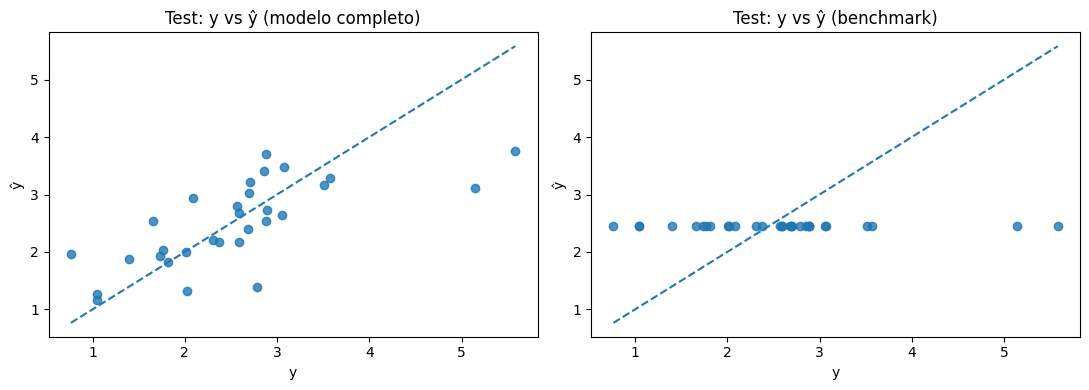

In [31]:
# 5) Error en evaluación + benchmark y gráficos
# Predicción con modelo completo (statsmodels para variar)
yhat_test_full = model_sm.predict(sm.add_constant(X_test))
mse_full = np.mean((y_test - yhat_test_full)**2)
print(f"\nMSE en test - Modelo completo: {mse_full:.3f}")

# Benchmark del libro: predecir con la media del y en TRAIN
ybar_train = y_train.mean()
yhat_test_bench = np.repeat(ybar_train, len(y_test))
mse_bench = np.mean((y_test - yhat_test_bench)**2)
print(f"MSE en test - Benchmark (media de y_train): {mse_bench:.3f}")

# Gráficos y vs y_hat (test)
fig, ax = plt.subplots(1,2, figsize=(11,4))
ax[0].scatter(y_test, yhat_test_full, alpha=0.8)
ax[0].plot([y_test.min(), y_test.max()],
           [y_test.min(), y_test.max()], ls='--')
ax[0].set_title("Test: y vs ŷ (modelo completo)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("ŷ")

ax[1].scatter(y_test, yhat_test_bench, alpha=0.8)
ax[1].plot([y_test.min(), y_test.max()],
           [y_test.min(), y_test.max()], ls='--')
ax[1].set_title("Test: y vs ŷ (benchmark)")
ax[1].set_xlabel("y")
ax[1].set_ylabel("ŷ")
plt.tight_layout()
plt.show()

# Ejercicio 4: resto de codigo


Coeficientes SGD (última iteración) en el espacio ESCALADO:
 Intercept:  2.452
    lcavol:  0.712
   lweight:  0.291
       age: -0.142
      lbph:  0.210
       svi:  0.307
       lcp: -0.287
   gleason: -0.021
     pgg45:  0.276


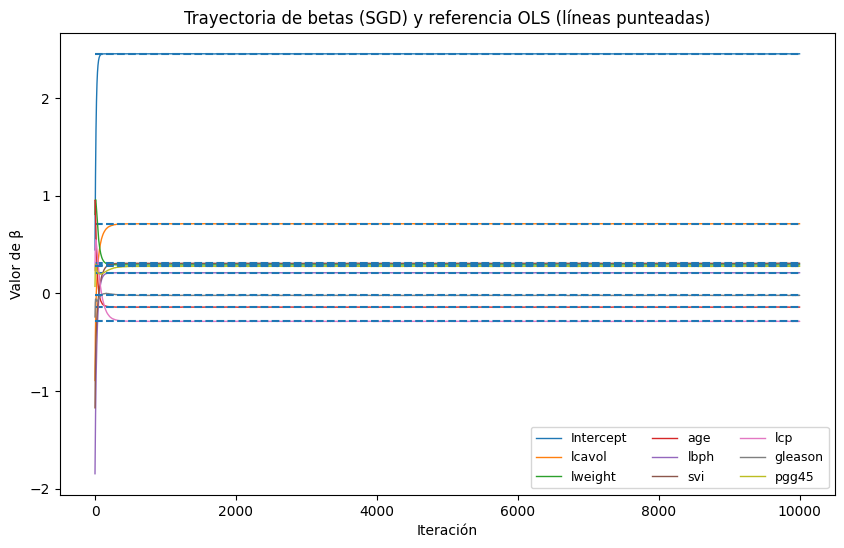

MSE en test - SGD: 0.522


In [33]:
# SEGUNDO EJERCICIO: OLS con SGD (estocástico)

# --- Escalado de predictores (recomendado para SGD)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)  # ajustar sólo con TRAIN
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

# Construimos matrices con intercepto
Xs_train_b = np.c_[np.ones(n_train), Xs_train]
Xs_test_b  = np.c_[np.ones(len(Xs_test)), Xs_test]

# Referencia: coeficientes OLS en el espacio escalado
# (Para comparar trayectorias; calculo OLS sobre Xs_train_b)
beta_ref = np.linalg.inv(Xs_train_b.T @ Xs_train_b) @ (Xs_train_b.T @ y_train)

def sgd_ols(X, y, eta=0.001, n_iter=10_000, seed=0, shuffle=True):
    """
    SGD para mínimos cuadrados
    X: matriz con intercepto (columna de 1s NO escalar)
    y: vector objetivo
    Devuelve: beta, historial de betas (iter x p)
    """
    rng = np.random.default_rng(seed)
    n, p = X.shape
    beta = rng.normal(0, 1, size=p)  # init N(0,1) como se sugiere
    hist = np.zeros((n_iter, p))

    idx = np.arange(n)
    for t in range(n_iter):
        if shuffle:
            rng.shuffle(idx)
        for i in idx:
            xi = X[i, :]
            yi = y[i]
            # gradiente de (1/2)(yi - xi^T beta)^2 = -(yi - xi^T beta) * xi
            error = yi - xi @ beta
            grad = - error * xi
            beta = beta - eta * grad
        hist[t, :] = beta
    return beta, hist

# Correr SGD con parámetros pedidos
beta_sgd, hist = sgd_ols(Xs_train_b, y_train, eta=0.001, n_iter=10_000, seed=42)

print("\nCoeficientes SGD (última iteración) en el espacio ESCALADO:")
for name, val in zip(["Intercept"] + predictors, beta_sgd):
    print(f"{name:>10s}: {val: .3f}")

# Gráfico de la evolución de cada beta y líneas horizontales con OLS (esc.)
plt.figure(figsize=(10,6))
for j, name in enumerate(["Intercept"] + predictors):
    plt.plot(hist[:, j], label=name, lw=1)
    plt.hlines(beta_ref[j], xmin=0, xmax=len(hist)-1, linestyles='dashed')
plt.title("Trayectoria de betas (SGD) y referencia OLS (líneas punteadas)")
plt.xlabel("Iteración")
plt.ylabel("Valor de β")
plt.legend(ncol=3, fontsize=9)
plt.show()

# Predicción en test con SGD
yhat_test_sgd = Xs_test_b @ beta_sgd
mse_sgd = np.mean((y_test - yhat_test_sgd)**2)
print(f"MSE en test - SGD: {mse_sgd:.3f}")



Ahora si dió parecido al libro, wtf??

In [34]:
# ------------------------------------------
# Experimentos: distintas tasas e iteraciones
# ------------------------------------------
def run_experiment(etas=(1e-4, 1e-3, 1e-2), iters=(1000, 5000, 20000)):
    out = []
    for eta in etas:
        for it in iters:
            _, _ = None, None
            beta_tmp, _ = sgd_ols(Xs_train_b, y_train, eta=eta, n_iter=it, seed=0)
            mse_tmp = np.mean((y_test - (Xs_test_b @ beta_tmp))**2)
            out.append({"eta": eta, "n_iter": it, "test_MSE": mse_tmp})
    return pd.DataFrame(out).sort_values(["eta","n_iter"])

exp = run_experiment()
print("\nExploración de hiperparámetros (eta vs iteraciones):")
display(exp)

# ------------------------------------------
# Ideas de mejora (comentario orientativo)
# ------------------------------------------
improvements = """
Sugerencias para mejorar SGD en OLS:
- Condición de parada: detener cuando ||grad|| < tol o cuando la mejora en el MSE
  de validación sea menor a tol por K épocas.
- Programas de aprendizaje (learning-rate schedules): eta_t = eta0 / (1 + a t)
  o usar decaimiento exponencial. También usar warm restarts o cosine annealing.
- Mini-batch SGD: actualizar con lotes de tamaño b (e.g., 16, 32, 64) para
  reducir varianza del gradiente y aprovechar vectorización.
- Momentum / Nesterov: suaviza y acelera la convergencia en valles curvos.
- Regularización: L2 (Ridge) o L1 (Lasso) para controlar varianza y mejorar
  generalización; en SGD se agrega el término de penalización en el gradiente.
- Barajado y estratificación: reordenar ejemplos cada época; si hubiera fuerte
  desbalance, mantener cierta estratificación.
- Estandarización/normalización: (ya aplicada) imprescindible para estabilidad.
"""
print(improvements)



Exploración de hiperparámetros (eta vs iteraciones):


,eta,n_iter,test_MSE
0,0.0001,1000,0.447724
1,0.0001,5000,0.519568
2,0.0001,20000,0.521272
3,0.0010,1000,0.521933
4,0.0010,5000,0.521932
5,0.0010,20000,0.520918
6,0.0100,1000,0.548019
7,0.0100,5000,0.518382
8,0.0100,20000,0.523840



Sugerencias para mejorar SGD en OLS:
- Condición de parada: detener cuando ||grad|| < tol o cuando la mejora en el MSE
  de validación sea menor a tol por K épocas.
- Programas de aprendizaje (learning-rate schedules): eta_t = eta0 / (1 + a t)
  o usar decaimiento exponencial. También usar warm restarts o cosine annealing.
- Mini-batch SGD: actualizar con lotes de tamaño b (e.g., 16, 32, 64) para
  reducir varianza del gradiente y aprovechar vectorización.
- Momentum / Nesterov: suaviza y acelera la convergencia en valles curvos.
- Regularización: L2 (Ridge) o L1 (Lasso) para controlar varianza y mejorar
  generalización; en SGD se agrega el término de penalización en el gradiente.
- Barajado y estratificación: reordenar ejemplos cada época; si hubiera fuerte
  desbalance, mantener cierta estratificación.
- Estandarización/normalización: (ya aplicada) imprescindible para estabilidad.

